<a href="https://colab.research.google.com/github/poojasree0816/Basic-Coding/blob/main/pancreatic_tumor_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/train.zip

In [ ]:
!unzip /content/test.zip

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math 
import shutil
import glob

In [ ]:
#count the number of images in the respective classes
ROOT_DIR="/content/trainval"
number_of_images={}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))

In [ ]:
number_of_images.items()

dict_items([('pancreatic_tumor', 578), ('normal', 421)])

In [ ]:
def dataFolder(p,split):
  #we creat ea training folder 
  if not os.path.exists("./"+p):
    os.mkdir("./"+p)
    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+"/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),size=(math.floor(split*number_of_images[dir])-5),replace=False):
        O=os.path.join(ROOT_DIR,dir,img)
        D=os.path.join("./"+p,dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print("Train Folder exist")

In [ ]:
dataFolder("trainn",0.85)

In [ ]:
dataFolder("valn",0.15)

In [ ]:
number_of_images={}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))
number_of_images.items()

dict_items([('pancreatic_tumor', 11), ('normal', 11)])

In [ ]:
pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 2.0 MB/s eta 0:00:00


In [ ]:
from keras.layers import Conv2D,MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
import keras

In [ ]:
model= Sequential()

model.add(Conv2D(filters = 16, kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))

model.add(Conv2D(filters = 36, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))

model.summary()

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [ ]:
def preprocessingImages1(path):
  '''
  input: Path
  output: Pre processed images
  '''
  image_data= ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [ ]:
path='/content/trainn'
train_data=preprocessingImages1(path)

Found 838 images belonging to 2 classes.


In [ ]:
path='/content/test'
test_data=preprocessingImages1(path)

Found 412 images belonging to 2 classes.


In [ ]:
def preprocessingImages2(path):
  '''
  input: Path
  output: Pre processed images
  '''
  image_data= ImageDataGenerator(rescale=1/255)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [ ]:
path='/content/valn'
val_data=preprocessingImages2(path)

Found 139 images belonging to 2 classes.


In [ ]:
#Early Stopping and model check point
from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping
es=EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=3,verbose=1,mode='auto')


#ModelCheckpoints
mc=ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodel.h5",verbose=1,save_best_only=True,mode='auto')

cd=[es,mc]


In [ ]:
#Model Training

hs=model.fit_generator(generator=train_data,
                       steps_per_epoch=8,
                       epochs=30,
                       verbose=1,
                       validation_data=val_data,
                       validation_steps=16, 
                       callbacks=cd)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.3858 - accuracy: 0.8008


Epoch 1: val_accuracy improved from -inf to 0.96403, saving model to ./bestmodel.h5
8/8 [==============================] - 21s 1s/step - loss: 0.3858 - accuracy: 0.8008 - val_loss: 0.1790 - val_accuracy: 0.9640
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.1883 - accuracy: 0.9531

8/8 [==============================] - 4s 510ms/step - loss: 0.1883 - accuracy: 0.9531
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.0827 - accuracy: 0.9883

8/8 [==============================] - 4s 464ms/step - loss: 0.0827 - accuracy: 0.9883
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.0831 - accuracy: 0.9883

8/8 [==============================] - 4s 476ms/step - loss: 0.0831 - accuracy: 0.9883
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 0.1385 - accuracy: 0.9652

8/8 [==============================] - 4s 425ms/step - loss: 0.1385 - accuracy: 0.9652
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 0.0989 - accuracy: 0.9688

8/8 [==============================] - 5s 563ms/step - loss: 0.0989 - accuracy: 0.9688
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 0.0785 - accuracy: 0.9766

8/8 [==============================] - 6s 708ms/step - loss: 0.0785 - accuracy: 0.9766
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 0.0687 - accuracy: 0.9844

8/8 [==============================] - 4s 460ms/step - loss: 0.0687 - accuracy: 0.9844
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 0.0730 - accuracy: 0.9844

8/8 [==============================] - 5s 578ms/step - loss: 0.0730 - accuracy: 0.9844
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 0.0736 - accuracy: 0.9805

8/8 [==============================] - 4s 459ms/step - loss: 0.0736 - accuracy: 0.9805
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 0.0358 - accuracy: 0.9922

8/8 [==============================] - 4s 500ms/step - loss: 0.0358 - accuracy: 0.9922
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 0.0381 - accuracy: 0.9883

8/8 [==============================] - 5s 521ms/step - loss: 0.0381 - accuracy: 0.9883
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 0.0564 - accuracy: 0.9805

8/8 [==============================] - 4s 552ms/step - loss: 0.0564 - accuracy: 0.9805
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 0.0587 - accuracy: 0.9826

8/8 [==============================] - 5s 565ms/step - loss: 0.0587 - accuracy: 0.9826
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 0.0814 - accuracy: 0.9805

8/8 [==============================] - 4s 456ms/step - loss: 0.0814 - accuracy: 0.9805
Epoch 16/30
7/8 [=========================>....] - ETA: 0s - loss: 0.0657 - accuracy: 0.9866

8/8 [==============================] - 3s 395ms/step - loss: 0.0641 - accuracy: 0.9870
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 0.0917 - accuracy: 0.9688

8/8 [==============================] - 5s 582ms/step - loss: 0.0917 - accuracy: 0.9688
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 0.0984 - accuracy: 0.9766

8/8 [==============================] - 4s 461ms/step - loss: 0.0984 - accuracy: 0.9766
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 0.0905 - accuracy: 0.9766

8/8 [==============================] - 4s 459ms/step - loss: 0.0905 - accuracy: 0.9766
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 0.0763 - accuracy: 0.9805

8/8 [==============================] - 5s 672ms/step - loss: 0.0763 - accuracy: 0.9805
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 0.0658 - accuracy: 0.9766

8/8 [==============================] - 4s 498ms/step - loss: 0.0658 - accuracy: 0.9766
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 0.0668 - accuracy: 0.9844

8/8 [==============================] - 5s 562ms/step - loss: 0.0668 - accuracy: 0.9844
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 0.0505 - accuracy: 0.9766

8/8 [==============================] - 4s 454ms/step - loss: 0.0505 - accuracy: 0.9766
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 0.0561 - accuracy: 0.9844

8/8 [==============================] - 4s 460ms/step - loss: 0.0561 - accuracy: 0.9844
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 0.0522 - accuracy: 0.9805

8/8 [==============================] - 5s 604ms/step - loss: 0.0522 - accuracy: 0.9805
Epoch 26/30
7/8 [=========================>....] - ETA: 0s - loss: 0.0459 - accuracy: 0.9821

8/8 [==============================] - 3s 400ms/step - loss: 0.0449 - accuracy: 0.9826
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 0.0726 - accuracy: 0.9739

8/8 [==============================] - 4s 549ms/step - loss: 0.0726 - accuracy: 0.9739
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 0.0412 - accuracy: 0.9883

8/8 [==============================] - 6s 684ms/step - loss: 0.0412 - accuracy: 0.9883
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 0.0427 - accuracy: 0.9883

8/8 [==============================] - 5s 606ms/step - loss: 0.0427 - accuracy: 0.9883
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 0.0781 - accuracy: 0.9783

8/8 [==============================] - 4s 432ms/step - loss: 0.0781 - accuracy: 0.9783


In [ ]:
h=hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

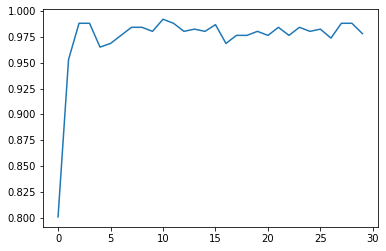

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'])

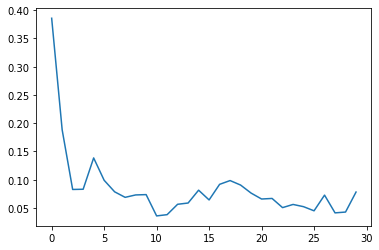

In [ ]:
plt.plot(h['loss'])

In [ ]:
from keras.models import load_model
model=load_model("/content/bestmodel.h5")

In [ ]:
#Model Accuracy
acc=model.evaluate_generator(test_data)[1]
print("Accuracy of our model is", acc)

Accuracy of our model is 0.9975728392601013


In [ ]:
from keras_preprocessing.image import load_img,img_to_array

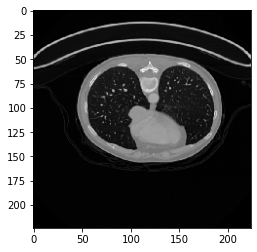

1/1 [==============================] - 0s 329ms/step
The image is normal


In [ ]:
path="/content/test/normal/1-001.jpg"
img=load_img(path,target_size=(224,224))
input_arr=img_to_array(img)/225
plt.imshow(input_arr)
plt.show()
input_arr=np.expand_dims(input_arr,axis=0)
'''predict_x=model.predict(input_arr) 
classes_x=np.argmax(predict_x,axis=1)
pred=model.predict_classes(input_arr)[0][0]'''
pred=(model.predict(input_arr) > 0.5).astype("int32")
if(pred==0):
  print("The image is normal")
else:
  print("The image is having a Tumor")